In [1]:
pip install langgraph duckduckgo-search

Note: you may need to restart the kernel to use updated packages.


In [2]:
from langchain.vectorstores import FAISS  
from langchain_huggingface import HuggingFaceEmbeddings

db = FAISS.load_local("faiss_index", embeddings=HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2"),allow_dangerous_deserialization=True)
retriever = db.as_retriever()
results = retriever.invoke("What is Simbolo")
print("\n".join([doc.page_content for doc in results]))

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Questions: What is Simbolo?
Answers: Símbolo is a training school which provides high-quality education in science and technology by offering courses in Artificial Intelligence, Data Science, Web Development, Mobile Development, and Information Technology. These courses combine theoretical knowledge with practical, project-based learning.
Questions: Where can we contact the Simbolo?
Answers: You can contact Simbolo in the following ways:
Email: simboloit@gmail.com
Phone: +959951716847
Messenger: https://m.me/Simboloit
Questions: What does Simbolo mean?
Answers: Símbolo is pronounced in Spanish which means symbol.
Questions: What is the location of Simbolo?
Answers: Simbolo is located at 91H*42H, Mahar Aung Myay, Mandalay. Let me know if you need directions!


In [48]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict


class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

In [106]:
from langchain_core.prompts import ChatPromptTemplate

system_prompt = (
    "You are a PDF Reader Assistant."
    "Provide concise and professional responses."
    "If the user asks a part of PDF, give clear and helpful information about it."
    "\n\n"
    "{context}"
)
prompt = ChatPromptTemplate(
    [
        ("system",system_prompt),
        ("human", "{question}"),
    ]
    )

In [107]:
from langchain_groq import ChatGroq

model = ChatGroq(model_name='llama-3.3-70b-versatile')

In [108]:
def retrieve(state: State):
    retrieved_docs = db.similarity_search(state["question"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = model.invoke(messages)
    return {"answer": response.content}

In [109]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

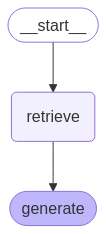

In [110]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [113]:
result = graph.invoke({"question": "what is simbolo"})
result

{'question': 'what is simbolo',
 'context': [Document(id='1acf6f90-6172-4041-a86d-e7002b8e41a5', metadata={'source': 'Simbolo Information - Sheet1.csv', 'row': 0}, page_content='Questions: What is Simbolo?\nAnswers: Símbolo is a training school which provides high-quality education in science and technology by offering courses in Artificial Intelligence, Data Science, Web Development, Mobile Development, and Information Technology. These courses combine theoretical knowledge with practical, project-based learning.'),
  Document(id='992861b5-dbce-4d13-b10c-e617f5116c64', metadata={'source': 'Simbolo Information - Sheet1.csv', 'row': 15}, page_content='Questions: Where can we contact the Simbolo?\nAnswers: You can contact Simbolo in the following ways:\nEmail: simboloit@gmail.com\nPhone: +959951716847\nMessenger: https://m.me/Simboloit'),
  Document(id='8aeeba9d-2f08-4182-acde-cafd5c7a62d1', metadata={'source': 'Simbolo Information - Sheet1.csv', 'row': 2}, page_content='Questions: What 

In [114]:
result['answer']

'Símbolo is a training school that provides high-quality education in science and technology, offering courses in Artificial Intelligence, Data Science, Web Development, Mobile Development, and Information Technology. These courses combine theoretical knowledge with practical, project-based learning.'

In [90]:
"You've provided the information about Simbolo. To confirm, the key points are:\n\n1. **What is Simbolo?**: A training school providing high-quality education in science and technology with courses like AI, Data Science, and IT.\n2. **Benefits for students**: Exclusive benefits include Membership Card, Jump Start Internship Program, Letter of Recommendation, Competition Mentorship, and Pocket Money Program.\n3. **Contact information**: Email (simboloit@gmail.com), Phone (+959951716847), and Messenger (https://m.me/Simboloit).\n4. **One on One classes**: Available for subjects like Python, Introduction to AI, Math Fundamentals, UX/UI, and more.\n\nIs there anything else you'd like to know or discuss about Simbolo?"


"It seems like you didn't provide any input or question. Please provide the question or topic related to Simbolo that you would like to know about, and I'll be happy to assist you."